<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="edaicon.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Exploratory Data Analysis
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

The zomato exploratory data analysis is for the foodies to find the best restaurants, value for money restaurants in their locality. It also helps to find their required cuisines in their locality.  

## Data Definition

**res_id**: The code given to a restaurant (Categorical) 

**name**: Name of the restaurant (Categorical)

**establishment**: Represents the type of establishment (Categorical)

**url**: The website of the restaurant (Categorical)

**address**: The address of the restaurant (Categorical)

**city**: City in which the restaurant located (Categorical)

**city_id**: The code given to a city (Categorical)

**locality**: Locality of the restaurant (Categorical)

**latitude**: Latitude of the restaurant (Categorical)

**longitude**: Longitude of the restaurant (Categorical)

**zipcode**: Zipcode of the city in which the restaurant located (Categorical)

**country_id**: Country code in which the restaurant located (Categorical)

**locality_verbose**: Locality along with the city in which the restaurant located (Categorical)

**cuisines**: The cuisines a restaurant serves (Categorical)

**timings**: The working hours of a restaurant (Categorical)

**average_cost_for_two**: The average amount expected for 2 people (Numerical)

**price_range**: The categories for average cost (Categories - 1,2,3,4) (Categorical)

**currency**: The currency in which a customer pays (Categorical)

**highlights**: The facilities of the restaurant (Categorical)

**aggregate_rating**: The overall rating a restaurant has got (Numerical) 

**rating_text**: Categorized ratings (Categorical)

**votes**: Number of votes received by the restaurant from customers (Numerical)

**photo_count**: The number of photos of a restaurant (Numerical)

**opentable_support**: Restaurant reservation from Opentable (Categorical)

**delivery**: The restaurant deliver an order or not (Categorical)

**takeaway**: The restaurant allows  a 'takeaway' of an order or not (Categorical)

## Table of Contents

1. **[Import Libraries](#import_lib)** 
2. **[Set Options](#set_options)** 
3. **[Read Data](#Read_Data)** 
4. **[Understand  and Prepare the Data](#Understand_Data)**
5. **[Understand the variables](#Understanding_variables)**
6. **[Check for Missing Values](#missing)**
7. **[Study Correlation](#correlation)**
8. **[Detect Outliers](#outliers)**
9. **[Create a new variable 'region'](#region)**
10. **[Some more analysis](#more)** 


<a id='import_lib'></a>
## 1. Import Libraries

<table align ="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Import the required libraries and functions
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [90]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score


<a id='set_options'></a>
## 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Make necessary changes to :<br><br>
Set the working directory              
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [91]:
os.listdir()

['.DS_Store',
 'ZomatoRestaurantsIndia.csv',
 'todo.png',
 'Capstone Project.ipynb',
 '.ipynb_checkpoints',
 '.git',
 'edaicon.png']

<a id='Read_Data'></a>
## 3. Read Data

In [92]:
dataset = pd.read_csv("ZomatoRestaurantsIndia.csv", parse_dates = ["timings"])

In [93]:
dataset.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1


<a id='Understand_Data'></a>
## 4. Understand  and Prepare the Data

A well-prepared data proves beneficial for analysis as it limits errors and inaccuracies that can occur during analysis. The processed data is more accessible to users.<br> <br>
                         Data understanding is the process of getting familiar with the data, to identify data type, to discover first insights into the data, or to detect interesting subsets to form hypotheses about hidden information. Whereas, data preparation is the process of cleaning and transforming raw data before analysis. It is an important step before processing and often involves reformatting data, making corrections to data. <br> <br>
                        Data preparation is often a lengthy process, but it is essential as a prerequisite to put data in context to get insights and eliminate bias resulting from poor data quality.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Analyze and prepare data:<br>
                        1. Check dimensions of the dataframe <br>
                        2. View the head of the data<br>
                        3. Note the redundant variables and drop them <br>
                        4. Check the data types. Refer to data definition to ensure your data types are correct. If data types are not as per business context, change the data types as per requirement <br>
                        5. Check for duplicates<br>
                        Note: It is an art to explore data and one will need more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### -------------------------*** Provide the inference's from the output of every code executed.***----------------------------

**1. Check dimensions of the dataframe in terms of rows and columns**

In [94]:
dataset.shape

(211944, 26)

###### 211944 Rows, 26 columns

**2. View the head of the data**

In [95]:
dataset.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,0.0,1,-1


**3. Note the redundant variables and drop them**

In [96]:
#  takeaway, opentable_support, currency are redundant variables as they have only 1 value.
redundant = ['takeaway', 'opentable_support', 'currency']
dataset = dataset.drop(['takeaway', 'opentable_support', 'currency'], axis = 1)


In [97]:
# Zipcode has too many null values so it should be removed
# City ID has same values corresponding to city so it can be removed
dataset = dataset.drop(['zipcode', 'city_id'], axis = 1)

**4. Check the data types. Refer to data definition to ensure your data types are correct. If data types are not as per business context, change the data types as per requirement**


In [98]:
dataset.isnull().sum()

res_id                     0
name                       0
establishment           4827
url                        0
address                  134
city                       0
locality                   0
latitude                   0
longitude                  0
country_id                 0
locality_verbose           0
cuisines                1391
timings                 3874
average_cost_for_two       0
price_range                0
highlights              2069
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
delivery                   0
dtype: int64

In [99]:
dataset.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
locality                 object
latitude                float64
longitude               float64
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
delivery                  int64
dtype: object

#### Change the incorrect data type

In [100]:
cat_attr = ['res_id', 'name', 'establishment', 'url',
            'address', 'city', 'locality', 'latitude',
            'longitude', 'locality_verbose', 'cuisines',
            'timings', 'price_range', 'highlights', 'rating_text', 'delivery']

In [101]:
dataset[cat_attr] = dataset[cat_attr].astype("category")

In [102]:
dataset.dtypes

res_id                  category
name                    category
establishment           category
url                     category
address                 category
city                    category
locality                category
latitude                category
longitude               category
country_id                 int64
locality_verbose        category
cuisines                category
timings                 category
average_cost_for_two       int64
price_range             category
highlights              category
aggregate_rating         float64
rating_text             category
votes                      int64
photo_count                int64
delivery                category
dtype: object

**5. Check for Duplicates**

In [103]:
duplicateRows = dataset[dataset.duplicated()]

In [104]:
print(duplicateRows)

          res_id                            name  establishment  \
101      3400059           Peshawri - ITC Mughal    Fine Dining   
116      3400060           Taj Bano - ITC Mughal    Fine Dining   
140      3400017                  Pinch Of Spice  Casual Dining   
141      3400018                  Pinch Of Spice  Casual Dining   
142      3400850                      Urban Deck  Casual Dining   
...          ...                             ...            ...   
211937  18855810             Biryani aur Baatein  Casual Dining   
211938  18662583                     Wok On Fire  Casual Dining   
211939   3202251  Kali Mirch Cafe And Restaurant  Casual Dining   
211941  18984164                The Grand Thakar  Casual Dining   
211943  18879846      Freshcos - The Health Cafe           Café   

                                                      url  \
101     https://www.zomato.com/agra/peshawri-itc-mugha...   
116     https://www.zomato.com/agra/taj-bano-itc-mugha...   
140     http

<a id = 'Understanding_variables'> </a>
## 5. Understand the variables

**1. Variable 'name'**

In [105]:
print(dataset.name.value_counts())

Dominos Pizza            3164
KFC                      1343
Cafe Coffee Day          1068
Pizza Hut                 986
Subway                    776
                         ... 
Maldhari Dayning Hall       1
Maldhari Restaurant         1
Malgudi Mithais             1
Malgudi Tiffin              1
# Wednesday                 1
Name: name, Length: 40965, dtype: int64


In [106]:
# Name of the restaurant is dominated by dominos pizza (3164) in the zomato app.

**2. Variable 'establishment'**

In [107]:
print(dataset.establishment.value_counts())

Quick Bites        64390
Casual Dining      61808
Café               22760
Bakery              8282
Dessert Parlour     7961
Bar                 6553
Fine Dining         6401
Sweet Shop          6103
Beverage Shop       5571
Dhaba               2939
Lounge              2761
Food Court          2722
Kiosk               1829
Bhojanalya          1400
Pub                 1396
Food Truck          1289
Microbrewery         866
Mess                 611
Paan Shop            521
Club                 340
Confectionery        306
Butcher Shop         170
Cocktail Bar          64
Shack                 44
Irani Cafe            24
Pop up                 6
Name: establishment, dtype: int64


In [108]:
# Establishment is dominated by Quick Bites (64390) in the zomato app.

**3. Variable 'city'**

In [109]:
print(dataset.city.value_counts())

Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
                 ...  
Ghaziabad          132
Faridabad          124
Howrah              66
Greater Noida       33
Nayagaon            17
Name: city, Length: 98, dtype: int64


In [110]:
# Cities from which users use the app the most is Chennai (11630)

**Let us find the count of restaurants in each city**

In [111]:
print(dataset.city.value_counts())

Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
                 ...  
Ghaziabad          132
Faridabad          124
Howrah              66
Greater Noida       33
Nayagaon            17
Name: city, Length: 98, dtype: int64


**4. Variable 'locality'**

In [112]:
print(dataset.locality.value_counts())

Civil Lines                     3660
Model Town                      2241
Ana Sagar Lake                  1760
Vijay Nagar                     1548
Shastri Nagar                   1454
                                ... 
Omega 1                            1
The Fern Residency, Ratanada       1
Omega 2                            1
One Centre, New Palsia             1
Quality Inn - Shravanthi,          1
Name: locality, Length: 3731, dtype: int64


**4. Variable 'latitude'**

From the variable 'latitude', we know the latitudinal location of the restaurant

The Latitudinal extent of India 8º4‛N to 37º6‛ N. 

We must check whether we have any points beyond this extent.

- We need to replace all these values with NaN's.

- check if the values are replace by NaN's

- We see all the values are replaced by NaN's

In [113]:
# Convert Degrees and minutes to radians 
# 8º4‛N is equal to 0.315322818 radians
# 37º6‛N is equal to 0.647517152 radians

In [114]:
radians_1 = 0.315322818
radians_2 = 0.647517152

In [115]:
dataset.shape

(211944, 21)

In [116]:
dataset['latitude'] = dataset['latitude'].astype('float64')
dataset['latitude_in_radians'] = np.radians(dataset['latitude'])

In [117]:
columns = dataset.columns

In [118]:
data_out_of_bounds = dataset.loc[(dataset['latitude_in_radians'] < radians_1) |
                                 (dataset['latitude_in_radians'] > radians_2), ]

In [119]:
# dataset = dataset.difference(data_out_of_bounds)
dataset = dataset[~dataset.isin(data_out_of_bounds).all(1)]

In [120]:
dataset.shape

(148968, 22)

**5. Variable 'longitude'**

From the variable 'longitude', we know the longitudinal location of the restaurant

The Longitudinal extent of India is from 68°7'E to 97°25'E

We must check whether we have any points beyond this extent.

In [ ]:
radians_1 = 1.18886011
radians_2 = 1.70024158

In [121]:
dataset['longitude'] = dataset['longitude'].astype('float64')
dataset['longitude_in_radians'] = np.radians(dataset['longitude'])

In [122]:
columns = dataset.columns

In [123]:
dataset.head()

,res_id,name,establishment,url,address,city,locality,latitude,longitude,country_id,...,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,latitude_in_radians,longitude_in_radians
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,1,...,700,2,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,-1,0.474929,1.361398
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,1,...,600,2,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,-1,0.474041,1.361559
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,1,...,300,1,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,1,0.474432,1.361002
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,1,...,300,1,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,1,0.474828,1.361441
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,1,...,1000,3,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,1,0.473991,1.362272


In [124]:
data_out_of_bounds_longitude = dataset.loc[(dataset['longitude_in_radians'] < radians_1) |
                                 (dataset['longitude_in_radians'] > radians_2), ]

In [125]:
data_out_of_bounds_longitude.head()

,res_id,name,establishment,url,address,city,locality,latitude,longitude,country_id,...,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,latitude_in_radians,longitude_in_radians
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,1,...,700,2,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,-1,0.474929,1.361398
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,1,...,600,2,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,-1,0.474041,1.361559
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,1,...,300,1,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,1,0.474432,1.361002
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,1,...,300,1,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,1,0.474828,1.361441
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,1,...,1000,3,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,1,0.473991,1.362272


In [73]:
# dataset = dataset[~dataset.isin(data_out_of_bounds_longitude).all(1)]

In [126]:
dataset.shape

(148968, 23)

- We need to replace all these values with NaN's.

- Check if the values are replace by NaN's

- From variable 'latitude' and 'longitude', plot the location of restaurants.

**6. Variable 'cuisines'**

- To find the unique cusines we write a small user defined function.



In [127]:
def unique(val):
    v = []
    if(val['cuisines'].value_counts() == 1).any():
        v.append(dataset['cuisines'])
    return v

In [128]:
unique(dataset)

[0         North Indian, South Indian, Mithai, Street Foo...
 1         North Indian, Mughlai, Rolls, Chinese, Fast Fo...
 2                                         Fast Food, Mithai
 3                 Desserts, Bakery, Fast Food, South Indian
 4                        North Indian, Continental, Italian
                                 ...                        
 211939                                         North Indian
 211940                                            Fast Food
 211941                      Gujarati, North Indian, Chinese
 211942                           Fast Food, Sandwich, Salad
 211943                           Cafe, Healthy Food, Coffee
 Name: cuisines, Length: 148968, dtype: category
 Categories (9382, object): [Afghan, Afghan, American, Afghan, Arabian, BBQ, Beverages, Biryani, Maha..., Afghan, Arabian, BBQ, Beverages, Burger, ..., Wraps, Sandwich, Pizza, Bakery, Wraps, Sandwich, Rolls, Fast Food, Burger, Wraps, Sandwich, Rolls, Pizza, Burger, Wraps, Sandwic

- find out the frequency of each cuisine

In [129]:
dataset.cuisines.value_counts()

North Indian                                                 14485
Fast Food                                                     5718
North Indian, Chinese                                         5159
Cafe                                                          5119
Pizza, Fast Food                                              3219
                                                             ...  
Cafe, Ice Cream, Beverages                                       0
North Indian, Biryani, Chinese, Seafood                          0
Raw Meats, Naga                                                  0
Cafe, Healthy Food, Sandwich, Burger, Desserts, Beverages        0
Goan, Chinese, Italian, North Indian, Continental                0
Name: cuisines, Length: 9382, dtype: int64

**8. Variable 'average_cost_for_two'**

In [130]:
dataset.average_cost_for_two.value_counts()

500     15945
400     15899
300     15783
200     14428
600      9585
        ...  
380         1
620         1
1230        1
2           1
312         1
Name: average_cost_for_two, Length: 128, dtype: int64

In [131]:
# Average Cost of two has a maximum value of Rs 300 , i.e most of
# the users spend 300 rupees when they go to a restaurant

**9. Variable 'price_range'**

In [132]:
dataset.price_range.value_counts()

1    61883
2    54600
3    24040
4     8445
Name: price_range, dtype: int64

- visualize a exploded pie chart.

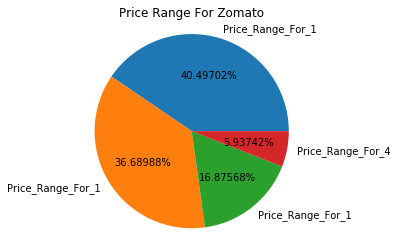

In [133]:
import matplotlib.pyplot as plt

my_data = [85831,77762,35767,12584]
my_labels = 'Price_Range_For_1','Price_Range_For_1','Price_Range_For_1','Price_Range_For_4'
plt.pie(my_data,labels=my_labels,autopct='%1.5f%%')
plt.title('Price Range For Zomato')
plt.axis('equal')
plt.show()

**10. Variable 'highlights'**

In [134]:
dataset.highlights.value_counts()

Dinner, Takeaway Available, Lunch, Cash, Indoor Seating                                                                                                                                                                       2329
Dinner, Delivery, Lunch, Cash, Takeaway Available, Indoor Seating                                                                                                                                                             1777
Cash                                                                                                                                                                                                                           883
Lunch, Cash, Takeaway Available, No Alcohol Available, Dinner, Delivery, Indoor Seating                                                                                                                                        839
Dinner, Cash, Takeaway Available, Debit Card, Lunch, Delivery, Credit Card, Indoor Seating, 



- write a small function to know the number of times a facility has appeared in the 'Highlights'.

In [135]:
def count(facility):
    return facility.highlights.value_counts()

print(count(dataset))

Dinner, Takeaway Available, Lunch, Cash, Indoor Seating                                                                                                                                                                       2329
Dinner, Delivery, Lunch, Cash, Takeaway Available, Indoor Seating                                                                                                                                                             1777
Cash                                                                                                                                                                                                                           883
Lunch, Cash, Takeaway Available, No Alcohol Available, Dinner, Delivery, Indoor Seating                                                                                                                                        839
Dinner, Cash, Takeaway Available, Debit Card, Lunch, Delivery, Credit Card, Indoor Seating, 

- Now we find out which facility occurs most number of in the data.

In [136]:
# ( Dinner, Takeaway Available, Lunch, Cash, Indoor Seating ) facility  occurs the most with the value of 3352

**11. Variable 'aggregate_rating'** 



In [137]:
dataset.aggregate_rating.value_counts()

0.0    16196
4.0    13262
3.9    11450
4.1    11394
3.8    10370
4.2     9682
3.7     8637
3.2     7996
4.3     7863
3.6     6799
3.3     6270
3.5     5848
4.4     5517
3.4     5458
4.5     4016
4.6     2776
3.1     2303
3.0     2253
2.9     2056
4.7     1701
2.8     1701
2.7     1228
4.8     1097
4.9      991
2.6      722
2.5      472
2.4      443
2.3      299
2.2      102
2.1       34
2.0       18
1.9       11
1.8        3
Name: aggregate_rating, dtype: int64

**12. Variable 'rating_text'**



In [138]:
dataset.rating_text.value_counts()

Very Good        47511
Good             43020
Average          30442
Not rated        16196
Excellent        10479
Poor               907
Çok iyi             47
Excelente           39
Sangat Baik         38
Muito Bom           31
Bardzo dobrze       22
Muy Bueno           22
Velmi dobré         20
Harika              19
Bom                 19
Baik                17
Skvělé              17
İyi                 15
Veľmi dobré         14
Terbaik             13
Skvělá volba        12
Ottimo              10
Dobré                9
Wybitnie             6
Buono                5
Vynikajúce           5
Bueno                4
Průměr               4
Muito bom            3
Eccellente           3
Ortalama             3
Dobrze               3
Priemer              3
Scarso               3
Media                2
Média                2
Promedio             1
Biasa                1
Średnio              1
Name: rating_text, dtype: int64

Creating a New feature for better understanding of ratings


**13. Variable 'votes'**

In [139]:
dataset.votes.value_counts()

0       7469
1       4726
2       3494
3       3008
4       3003
        ... 
3184       1
1870       1
1612       1
1739       1
1429       1
Name: votes, Length: 2261, dtype: int64

**14. Variable 'photo_count'**

In [140]:
dataset.photo_count.value_counts()

0       17789
1        7496
2        6166
3        5419
4        4632
        ...  
1361        1
2512        1
1616        1
1488        1
2367        1
Name: photo_count, Length: 2260, dtype: int64

**15. Variable 'delivery'**

In [141]:
dataset.delivery.value_counts()

-1    90596
 1    57773
 0      599
Name: delivery, dtype: int64

<a id ='missing'></a>
## 6. Check for missing values

In [142]:
dataset.isnull().sum()

res_id                     0
name                       0
establishment           4827
url                        0
address                  134
city                       0
locality                   0
latitude                   0
longitude                  0
country_id                 0
locality_verbose           0
cuisines                1391
timings                 3874
average_cost_for_two       0
price_range                0
highlights              2069
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
delivery                   0
latitude_in_radians        0
longitude_in_radians       0
dtype: int64

**6. Study summary statistics**

Let us check the summary statistics for numerical variables.

In [143]:
dataset.describe()

,latitude,longitude,country_id,average_cost_for_two,aggregate_rating,votes,photo_count,latitude_in_radians,longitude_in_radians
count,148968.000000,148968.000000,148968.0,148968.000000,148968.000000,148968.000000,148968.000000,148968.000000,148968.000000
mean,25.208164,78.061003,1.0,585.491401,3.399215,345.280503,261.440531,0.439965,1.362422
std,4.335694,5.465505,0.0,624.629817,1.274583,721.620148,939.724721,0.075672,0.095391
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.299166,74.636225,1.0,250.000000,3.300000,16.000000,4.000000,0.389194,1.302648
50%,25.610326,77.189519,1.0,400.000000,3.800000,103.000000,18.000000,0.446985,1.347211
75%,28.568881,80.324780,1.0,700.000000,4.100000,354.000000,112.000000,0.498621,1.401932
max,34.214702,91.832769,1.0,30000.000000,4.900000,14751.000000,17702.000000,0.597159,1.602784


Let us check the summary statistics for categorical variables.

In [144]:
dataset.describe(include = ['category'])

,res_id,name,establishment,url,address,city,locality,locality_verbose,cuisines,timings,price_range,highlights,rating_text,delivery
count,148968,148968,144141,148968,148834,148968,148968,148968,147577,145094,148968,146899,148968,148968
unique,40278,30434,26,40278,36789,97,2749,2915,6641,5640,4,23168,39,3
top,19123581,Dominos Pizza,Quick Bites,https://www.zomato.com/chennai/chettiar-biryan...,"Laxman Jhula, Tapovan, Rishikesh",Mumbai,Civil Lines,"Ana Sagar Lake, Ajmer",North Indian,11 AM to 11 PM,1,"Dinner, Takeaway Available, Lunch, Cash, Indoo...",Very Good,-1
freq,145,2500,47594,145,299,6494,3648,1758,14485,19032,61883,2329,47511,90596


<a id = 'correlation'> </a>
## 7. Study correlation

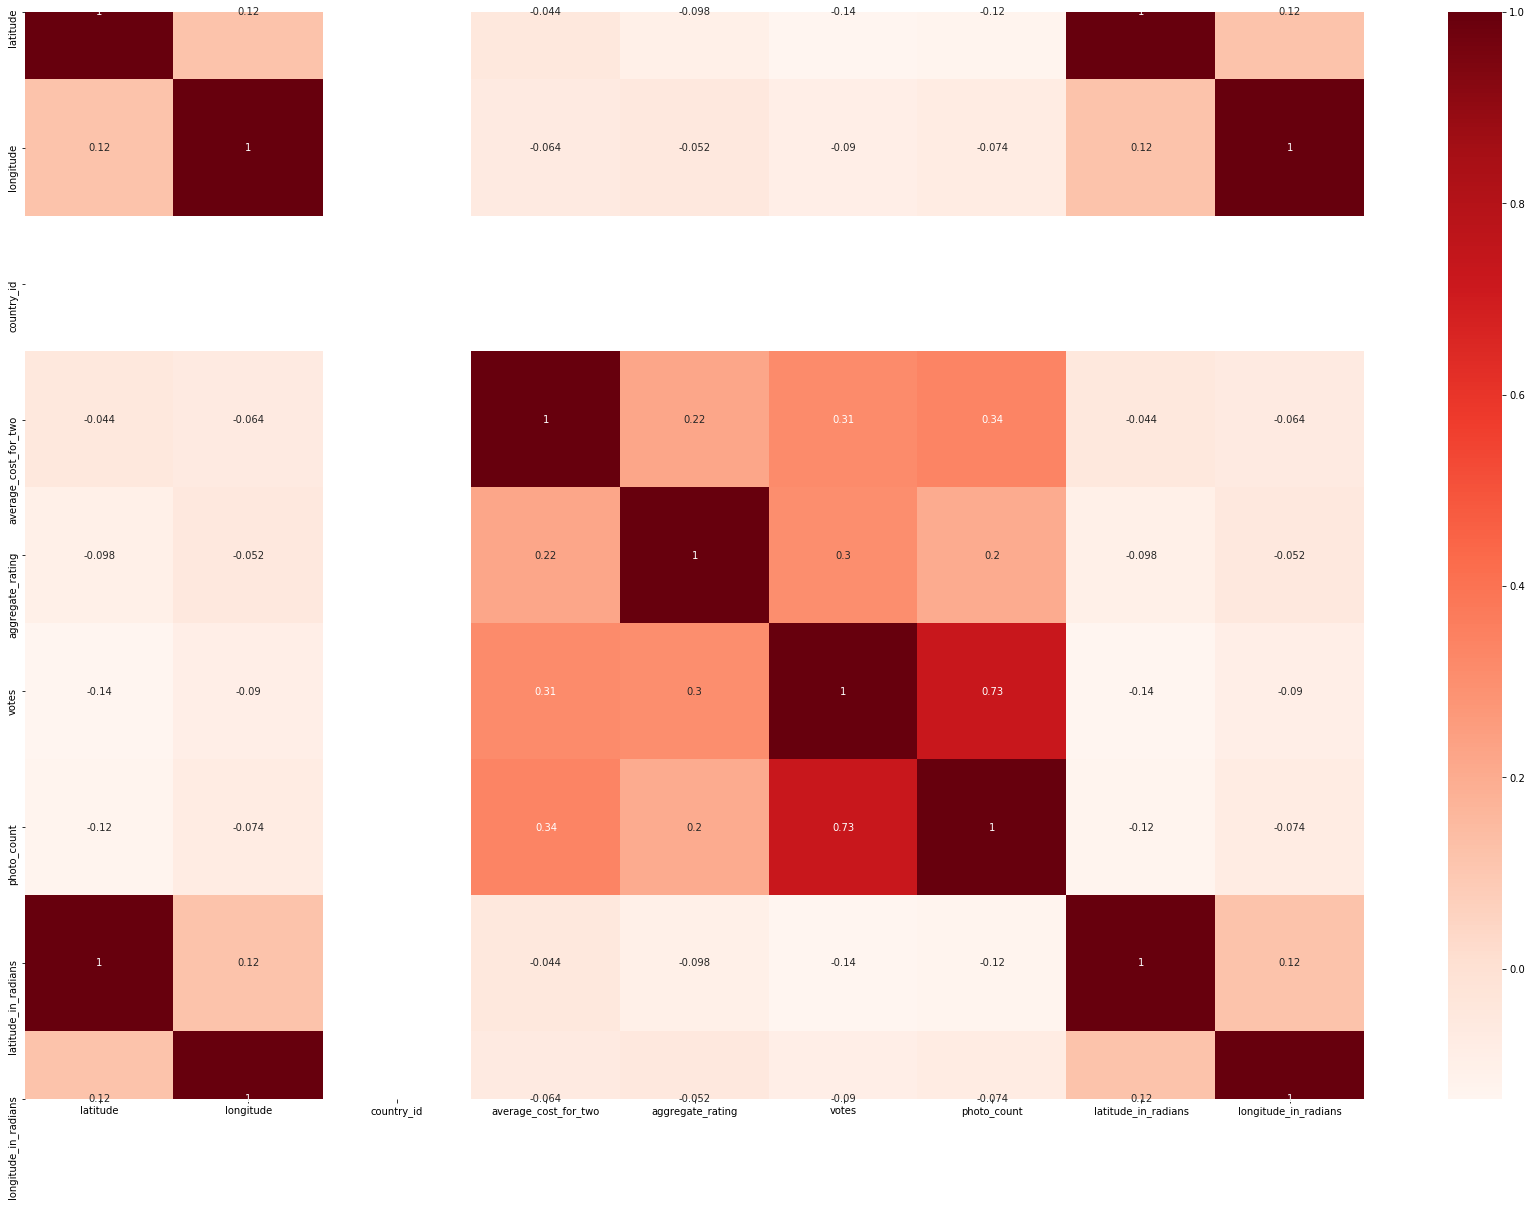

In [145]:
plt.figure(figsize=(30,20))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<a id='outliers'> </a>
## 8. Detect outliers

In [146]:
# Going by the summary statistics 
    # latitude value of 10000.000000 is an outlier .
    # average value for two of Rs30000 is an outlier .

<a id='region'> </a>
## 9. Create a new variable 'region'


Create a variable 'region' with four categories 'northern','eastern', 'southern', 'western' and 'central'. To do so, use the 'city' column, group all cities belonging to the same region. 

In [147]:
dataset.head()

,res_id,name,establishment,url,address,city,locality,latitude,longitude,country_id,...,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,latitude_in_radians,longitude_in_radians
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,1,...,700,2,"Lunch, Takeaway Available, Credit Card, Dinner...",4.4,Very Good,814,154,-1,0.474929,1.361398
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,1,...,600,2,"Delivery, No Alcohol Available, Dinner, Takeaw...",4.4,Very Good,1203,161,-1,0.474041,1.361559
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,1,...,300,1,"No Alcohol Available, Dinner, Takeaway Availab...",4.2,Very Good,801,107,1,0.474432,1.361002
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,1,...,300,1,"Takeaway Available, Credit Card, Lunch, Delive...",4.3,Very Good,693,157,1,0.474828,1.361441
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,1,...,1000,3,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.9,Excellent,470,291,1,0.473991,1.362272


In [148]:
dataset.groupby('city').max()

,latitude,longitude,country_id,average_cost_for_two,aggregate_rating,votes,photo_count,latitude_in_radians,longitude_in_radians
city,,,,,,,,,
Agra,27.232910,78.093911,1.0,6500.0,4.9,1203.0,690.0,0.475304,1.362996
Ahmedabad,23.180380,72.684973,1.0,2500.0,4.9,3610.0,3403.0,0.404574,1.268592
Ajmer,26.529458,74.698010,1.0,1500.0,4.8,658.0,167.0,0.463026,1.303726
Alappuzha,9.481701,76.330668,1.0,200.0,0.0,0.0,0.0,0.165487,1.332221
Allahabad,25.529296,81.918373,1.0,2000.0,4.8,3701.0,312.0,0.445570,1.429745
...,...,...,...,...,...,...,...,...,...
Varanasi,25.379981,83.113159,1.0,2000.0,4.9,1443.0,830.0,0.442964,1.450598
Vellore,12.977480,79.159988,1.0,800.0,3.9,60.0,10.0,0.226500,1.381602
Vijayawada,16.558487,80.702576,1.0,1500.0,3.7,96.0,46.0,0.289000,1.408526


<a id='more'> </a>
## 10. Some more Analysis

<b>Lets us explore the data some more now that we have extrapolated and removed the missing values <br>
We now conduct analysis to compare the regions.</b>

### 1. To find which cities have expensive restaurants 

-  plot the cities which have costliest restaurants. 

In [150]:
dataset.groupby("name")['average_cost_for_two'].max()

name
# Wednesday                             250.0
#1, Culinary Avenue - The Red Maple    1500.0
#788 Avenue                               NaN
#BC                                    2000.0
#BEiR                                     NaN
                                        ...  
 Food Street - Veg                      250.0
ट 4 Tasty                                 NaN
द Vege टेबल                            1000.0
स्पेस Bar                              1700.0
ह-tea The Tea Hut                       550.0
Name: average_cost_for_two, Length: 40965, dtype: float64

### 2.  Comparing regions

### 2a. Highlights available in restaurants for different regions

To cater our analysis we define the regions as nothern, eastern, western and southern.

We first need to select the unique facilities available in each region and sort according to their frequencies.

**Highlights of the northern region**

**Highlights of the eastern region**

**Highlights of the southern region**

**Highlights of the western region**

#### Plot the barplot for different regions

We shall now plot the graphs for top 10 highlights.

### 2b. Cuisines available in restaurants for different regions

**Cuisines in the northern region**

**Cuisines in the eastern region**

**Cuisines in the southern region**

**Cuisines in the western region** 

- Plot the barplot for top 10 cuisines served in the four regions

###  3. The Northern Region

**Now we shall consider only the northern region**

**1. The top 10 cuisines served in Restaurants** 

**2. Do restaurants with more photo counts and votes have better rating?**

- Plot a boxplots for the above table

### 4. The Mumbai city

consider the city mumbai and get a better insights of restuarants in Mumbai.

In [54]:
mumbai_ds = dataset.loc[(dataset['city'] == 'Mumbai')]

In [55]:
mumbai_ds.describe()

,latitude,country_id,average_cost_for_two,aggregate_rating,votes,photo_count,latitude_in_radians
count,6494.000000,6494.0,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000
mean,19.087974,1.0,1389.613489,4.006698,1404.088081,1861.352171,0.333148
std,0.088588,0.0,1321.531387,0.767809,1646.886722,2703.898110,0.001546
min,18.913193,1.0,50.000000,0.000000,0.000000,0.000000,0.330097
25%,19.031964,1.0,500.000000,3.900000,249.000000,211.000000,0.332170
50%,19.100085,1.0,1200.000000,4.100000,843.500000,873.000000,0.333359
75%,19.139950,1.0,1900.000000,4.400000,1980.000000,2420.000000,0.334055
max,19.464394,1.0,30000.000000,4.900000,10278.000000,16595.000000,0.339718


**1. Expensive restaurants in Mumbai**

-  Define the costliest restaurants whose average cost of two people exceeds Rs.5000 .
-  Plot the restaurants which are costliest based on their average cost for two .




In [56]:
expensive_rest = mumbai_ds.loc[(mumbai_ds['average_cost_for_two'] > 5000)]
# expensive_rest

In [57]:
expensive_restaurants = expensive_rest['name']
print(expensive_restaurants)

135881                            Vista - Taj Lands End
135910                      Souk - The Taj Mahal Palace
135918        Wasabi By Morimoto - The Taj Mahal Palace
135924                             Celini - Grand Hyatt
135925              Masala Kraft - The Taj Mahal Palace
135943                            San-Qi - Four Seasons
136060                        Bombay High - ITC Maratha
136240    Ocean - The Private Dining Room - Sahara Star
136241        Wasabi By Morimoto - The Taj Mahal Palace
136242                     Yuuka - The St. Regis Mumbai
136243              Masala Kraft - The Taj Mahal Palace
136244                             Celini - Grand Hyatt
136245           Le Cirque Signature - The Leela Mumbai
136246                            Vista - Taj Lands End
136247                      Souk - The Taj Mahal Palace
136248                            San-Qi - Four Seasons
136249                        Bombay High - ITC Maratha
136740    Ocean - The Private Dining Room - Saha

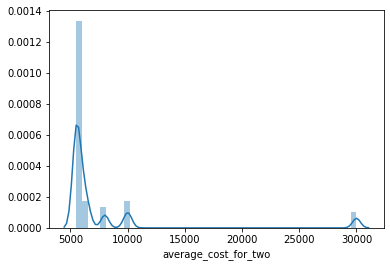

In [58]:
x = expensive_rest['average_cost_for_two']
ax = sns.distplot(x)

**2.To find the top 20 cuisines of Mumbai**

- select unique cuisines available at restaurants in Mumbai


- sort cuisines based on frequency


In [59]:
mumbai_ds.cuisines.value_counts()

Bakery, Desserts                                                             132
North Indian                                                                 113
Beverages, Desserts, Ice Cream                                                93
Cafe, Desserts                                                                90
American, North Indian, Chinese, Fast Food, Continental, Asian, Beverages     87
                                                                            ... 
Mughlai, Chinese, Finger Food                                                  0
Mughlai, Chinese, Indian, Afghan                                               0
Mughlai, Chinese, Italian                                                      0
Mughlai, Chinese, Italian, Continental                                         0
Afghan                                                                         0
Name: cuisines, Length: 9382, dtype: int64

In [60]:
mumbai_ds

,res_id,name,establishment,url,address,city,locality,latitude,longitude,country_id,...,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,latitude_in_radians
134852,18562340,Drinkery 51,Casual Dining,https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,Bandra Kurla Complex,19.067176,72.867493,1,...,12 Noon to 1:30 AM,2000,4,"Dinner, Debit Card, Lunch, Serves Alcohol, Cas...",4.4,Very Good,3796,1897,1,0.332785
134853,34757,Joeys Pizza,Quick Bites,https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,Malad West,19.178188,72.834666,1,...,11am – 12midnight (Mon-Sun),800,2,"Lunch, Cash, Takeaway Available, Debit Card, D...",4.5,Excellent,7932,4960,-1,0.334723
134854,18548172,Hitchki,Bar,https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,Powai,19.119930,72.907331,1,...,12 Noon to 1:30 AM,1600,3,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.7,Excellent,3762,12979,1,0.333706
134855,18392725,Tamasha,Lounge,https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,Lower Parel,19.006060,72.827496,1,...,12 Noon to 1 AM,2700,4,"Dinner, Cash, Takeaway Available, Credit Card,...",4.7,Excellent,4979,16595,-1,0.331718
134856,18962112,Bayroute,Fine Dining,https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,Juhu,19.110684,72.825368,1,...,12 Noon to 1:30 AM,3000,4,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.9,Excellent,706,2484,-1,0.333544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,NaN,https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,Powai,19.124284,72.914877,1,...,11 AM to 1 AM,400,1,"Cash, Debit Card, Takeaway Available, No Seati...",4.0,Very Good,726,703,1,0.333782
142349,37750,Faasos,Quick Bites,https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,Veera Desai Area,19.139601,72.833119,1,...,9 AM to 12 Midnight,450,1,"Dinner, Cash, Takeaway Available, Debit Card, ...",3.9,Good,510,251,1,0.334049
142350,18165909,Charcoal Eats Express,Quick Bites,https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,Lower Parel,19.002537,72.829391,1,...,11:30 AM to 11 PM,500,2,"Lunch, Cash, Credit Card, Dinner, Standing Tab...",4.0,Very Good,491,344,-1,0.331657
142351,18306481,Wok Express,Food Court,https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,1,...,11 AM to 11 PM,600,2,"No Alcohol Available, Dinner, Mall Parking, De...",3.7,Good,515,490,-1,0.334076


In [61]:
def unique(val):
    v = []
    if(val['cuisines'].value_counts() == 1).any():
        v.append(dataset['cuisines'])
    return v
values = unique(mumbai_ds)

In [62]:
print(values[0][0:20])

0     North Indian, South Indian, Mithai, Street Foo...
1     North Indian, Mughlai, Rolls, Chinese, Fast Fo...
2                                     Fast Food, Mithai
3             Desserts, Bakery, Fast Food, South Indian
4                    North Indian, Continental, Italian
5                                      Pizza, Fast Food
6        North Indian, Fast Food, Chinese, South Indian
7                                      Pizza, Fast Food
8                                     Bakery, Fast Food
9     Cafe, Chinese, Continental, Italian, Bakery, D...
10                   Continental, North Indian, Chinese
11    North Indian, South Indian, Mithai, Street Foo...
12                            Pizza, Fast Food, Italian
13                                         North Indian
14    North Indian, South Indian, Chinese, Bakery, C...
15                                     Pizza, Fast Food
16                       North Indian, Chinese, Mughlai
17                                    Burger, Fa

**3. To find the popular localities in Mumbai**

In [63]:
mumbai_ds.locality.value_counts()

Powai                                297
Andheri Lokhandwala, Andheri West    292
Malad West                           209
Borivali West                        202
Bandra Kurla Complex                 184
                                    ... 
Pashan                                 0
Paschim Vihar                          0
Parvati                                0
Partapur                               0
 32nd Avenue, NH8, Gurgaon             0
Name: locality, Length: 3731, dtype: int64

##### Powai is the most popular locality with 297 zomato users, Partapur is one amongst the least popular locality with 0 zomato users

**4. Check for relationship between 'aggregate_rating' and 'average_cost_for_two'**

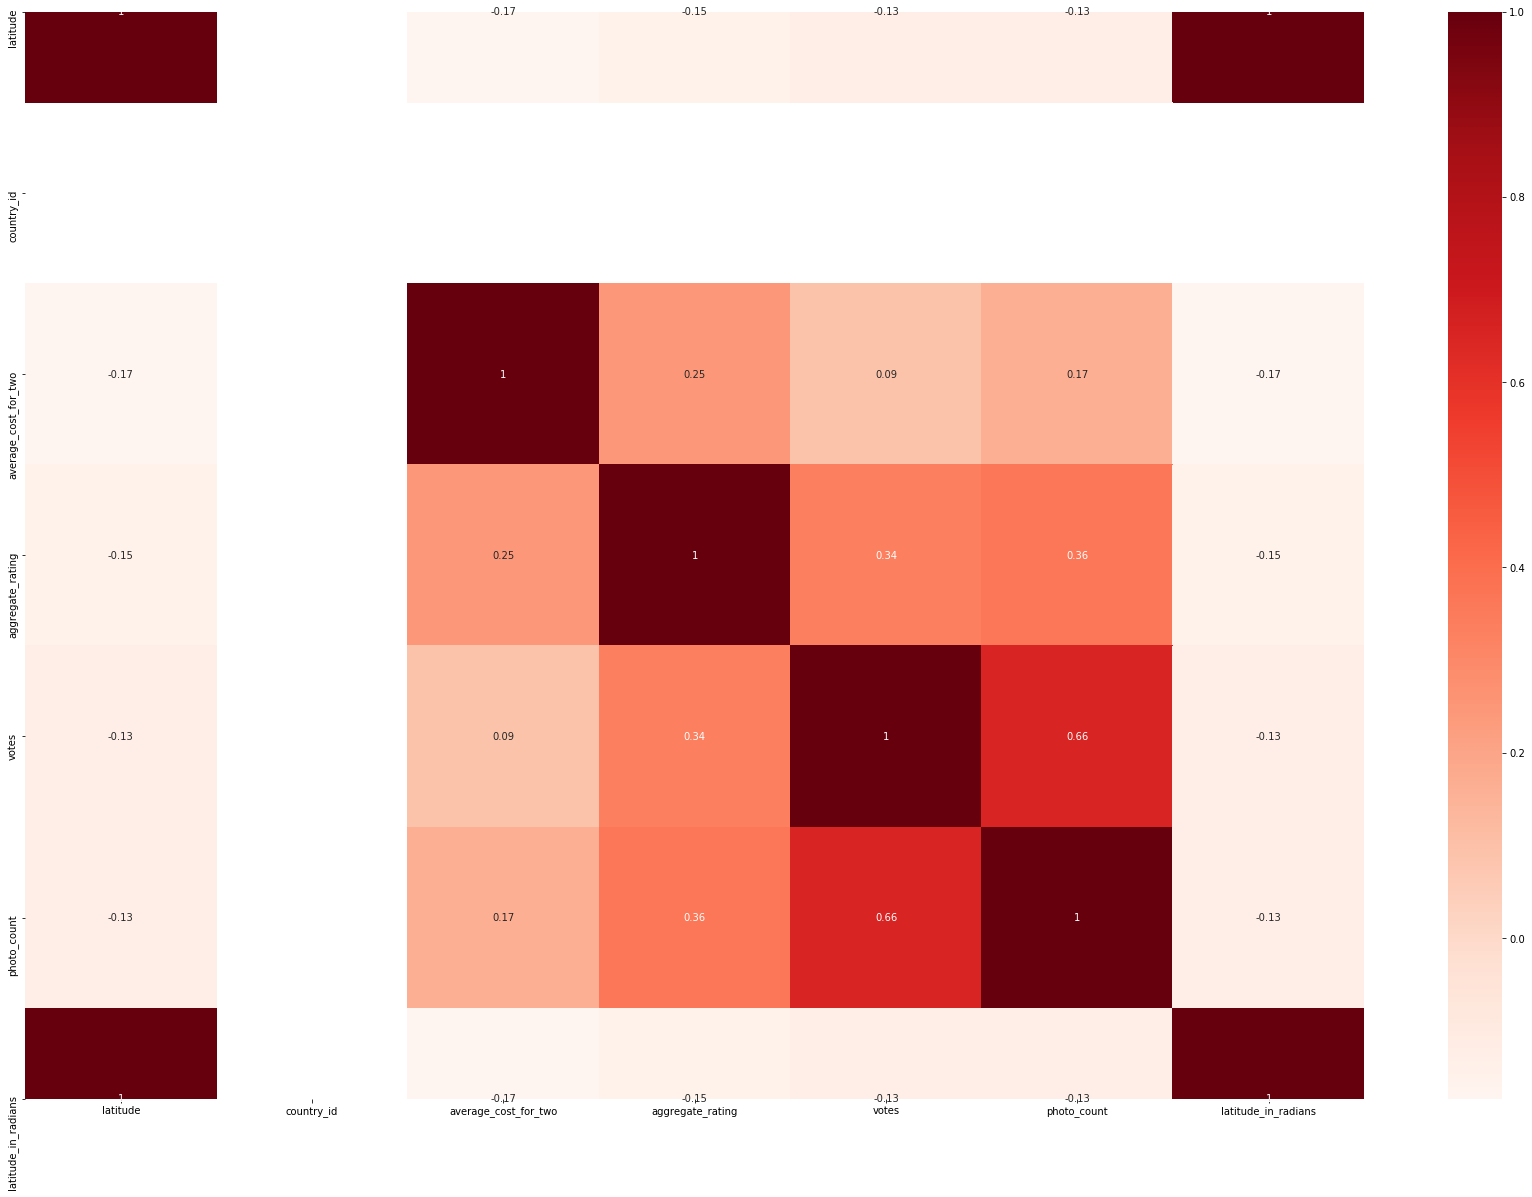

In [64]:
plt.figure(figsize=(30,20))
cor = mumbai_ds.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### From the corr plot we see that there is a weak correlation between aggregate_rating and  average_cost_for_two with the value of 0.25

In [65]:
mumbai_ds

,res_id,name,establishment,url,address,city,locality,latitude,longitude,country_id,...,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,latitude_in_radians
134852,18562340,Drinkery 51,Casual Dining,https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,Bandra Kurla Complex,19.067176,72.867493,1,...,12 Noon to 1:30 AM,2000,4,"Dinner, Debit Card, Lunch, Serves Alcohol, Cas...",4.4,Very Good,3796,1897,1,0.332785
134853,34757,Joeys Pizza,Quick Bites,https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,Malad West,19.178188,72.834666,1,...,11am – 12midnight (Mon-Sun),800,2,"Lunch, Cash, Takeaway Available, Debit Card, D...",4.5,Excellent,7932,4960,-1,0.334723
134854,18548172,Hitchki,Bar,https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,Powai,19.119930,72.907331,1,...,12 Noon to 1:30 AM,1600,3,"Lunch, Serves Alcohol, Cash, Credit Card, Dinn...",4.7,Excellent,3762,12979,1,0.333706
134855,18392725,Tamasha,Lounge,https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,Lower Parel,19.006060,72.827496,1,...,12 Noon to 1 AM,2700,4,"Dinner, Cash, Takeaway Available, Credit Card,...",4.7,Excellent,4979,16595,-1,0.331718
134856,18962112,Bayroute,Fine Dining,https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,Juhu,19.110684,72.825368,1,...,12 Noon to 1:30 AM,3000,4,"Dinner, Cash, Takeaway Available, Debit Card, ...",4.9,Excellent,706,2484,-1,0.333544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,NaN,https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,Powai,19.124284,72.914877,1,...,11 AM to 1 AM,400,1,"Cash, Debit Card, Takeaway Available, No Seati...",4.0,Very Good,726,703,1,0.333782
142349,37750,Faasos,Quick Bites,https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,Veera Desai Area,19.139601,72.833119,1,...,9 AM to 12 Midnight,450,1,"Dinner, Cash, Takeaway Available, Debit Card, ...",3.9,Good,510,251,1,0.334049
142350,18165909,Charcoal Eats Express,Quick Bites,https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,Lower Parel,19.002537,72.829391,1,...,11:30 AM to 11 PM,500,2,"Lunch, Cash, Credit Card, Dinner, Standing Tab...",4.0,Very Good,491,344,-1,0.331657
142351,18306481,Wok Express,Food Court,https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,1,...,11 AM to 11 PM,600,2,"No Alcohol Available, Dinner, Mall Parking, De...",3.7,Good,515,490,-1,0.334076


**5. Multiple box plot for photo_counts based on establishment type.**



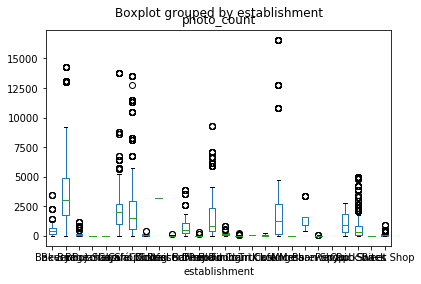

In [67]:
mumbai_ds.boxplot(by = 'establishment', column = ['photo_count'], grid = False) 

In [69]:
# mumbai_ds.boxplot(by = 'photo_count', column = ['establishment'], grid = False) 

**6. Check for payments method offered in restaurants**

- select unique facilities available at restaurants in western region
- sort facilities based on frequency
